## Homework

### Dataset

In this homework, we'll build a model for predicting if we have an image of a dino or a dragon. For this, we will use the "Dino or Dragon?" dataset that can be downloaded from [Kaggle](https://www.kaggle.com/datasets/agrigorev/dino-or-dragon). 

You can get a wget-able version [here](https://github.com/alexeygrigorev/dino-or-dragon/releases/download/data/dino-dragon.zip):

```bash
wget https://github.com/alexeygrigorev/dino-or-dragon/releases/download/data/dino-dragon.zip
unzip dino-dragon.zip
```

In the lectures we saw how to use a pre-trained neural network. In the homework, we'll train a much smaller model from scratch. 

**Note:** You will need an environment with a GPU for this homework. We recommend to use [Saturn Cloud](https://bit.ly/saturn-mlzoomcamp). 
You can also use a computer without a GPU (e.g. your laptop), but it will be slower.

In [ ]:
!pip install tensorflow

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img

%matplotlib inline

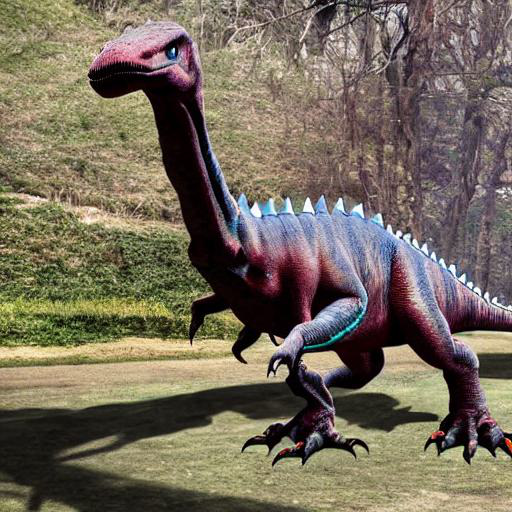

In [2]:
path = 'E:/YandexDisk/Data Science/ml-zoomcamp/08-deep-learning/dino-dragon/train/dino'
name = '00b7f1d3-9265-4971-9c51-4686ce97eadd.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

In [3]:
img = load_img(fullname, target_size=(299, 299))

In [4]:
x = np.array(img)
x.shape

(299, 299, 3)

In [5]:
x

array([[[ 95,  98,  51],
        [121, 124,  79],
        [117, 120,  75],
        ...,
        [ 88,  74,  71],
        [158, 146, 132],
        [178, 167, 147]],

       [[ 99, 102,  55],
        [ 92,  95,  50],
        [ 63,  66,  21],
        ...,
        [130, 116, 113],
        [161, 149, 137],
        [194, 183, 165]],

       [[113, 116,  69],
        [151, 154, 109],
        [136, 139,  94],
        ...,
        [156, 142, 141],
        [146, 133, 124],
        [177, 165, 151]],

       ...,

       [[132, 130,  79],
        [122, 120,  69],
        [139, 137,  86],
        ...,
        [210, 191, 161],
        [211, 191, 164],
        [207, 187, 160]],

       [[100,  98,  50],
        [135, 133,  85],
        [142, 140,  92],
        ...,
        [191, 174, 146],
        [207, 190, 162],
        [200, 183, 155]],

       [[125, 122,  77],
        [119, 116,  71],
        [113, 110,  65],
        ...,
        [158, 143, 114],
        [169, 154, 125],
        [189, 173, 147]]

### Data Preparation

The dataset contains around 1900 images of dinos and around 1900 images of dragons. 

The dataset contains separate folders for training and test sets. 

### Model

For this homework we will use Convolutional Neural Network (CNN). Like in the lectures, we'll use Keras.

You need to develop the model with following structure:

* The shape for input should be `(150, 150, 3)`
* Next, create a convolutional layer ([`Conv2D`](https://keras.io/api/layers/convolution_layers/convolution2d/)):
    * Use 32 filters
    * Kernel size should be `(3, 3)` (that's the size of the filter)
    * Use `'relu'` as activation 
* Reduce the size of the feature map with max pooling ([`MaxPooling2D`](https://keras.io/api/layers/pooling_layers/max_pooling2d/))
    * Set the pooling size to `(2, 2)`
* Turn the multi-dimensional result into vectors using a [`Flatten`](https://keras.io/api/layers/reshaping_layers/flatten/) layer
* Next, add a `Dense` layer with 64 neurons and `'relu'` activation
* Finally, create the `Dense` layer with 1 neuron - this will be the output
    * The output layer should have an activation - use the appropriate activation for the binary classification case

As optimizer use [`SGD`](https://keras.io/api/optimizers/sgd/) with the following parameters:

* `SGD(lr=0.002, momentum=0.8)`

For clarification about kernel size and max pooling, check [Office Hours](https://www.youtube.com/watch?v=1WRgdBTUaAc).

In [6]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [7]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

In [8]:
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [9]:
X = preprocess_input(X)

In [10]:
pred = model.predict(X)
decode_predictions(pred)

1/1 [==============================] - 5s 5s/step


[[('n01677366', 'common_iguana', 0.18495),
  ('n01704323', 'triceratops', 0.13308439),
  ('n01694178', 'African_chameleon', 0.05411692),
  ('n01698640', 'American_alligator', 0.040909205),
  ('n01687978', 'agama', 0.039514907)]]

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    'E:/YandexDisk/Data Science/ml-zoomcamp/08-deep-learning/dino-dragon/train/',
    class_mode='binary',
    target_size=(150, 150),
    batch_size=32,
)

Found 1594 images belonging to 2 classes.


In [13]:
train_ds.class_indices

{'dino': 0, 'dragon': 1}

In [14]:
X, y = next(train_ds)

In [15]:
y[:5]

array([0., 1., 0., 0., 0.], dtype=float32)

In [16]:
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

In [17]:
model = Sequential()

In [18]:
# The shape for input (150, 150, 3), use 32 filters, kernel size (3, 3), use 'relu' as activation 
model.add(Conv2D(32, 3, activation='relu', input_shape=(150, 150, 3)))

In [19]:
# Reduce the size of the feature map with max pooling, set the pooling size to (2, 2)
model.add(MaxPooling2D(pool_size=(2, 2)))

In [20]:
# Turn the multi-dimensional result into vectors using a Flatten layer
model.add(Flatten())

In [21]:
# Add a Dense layer with 64 neurons and 'relu' activation
model.add(Dense(64, activation='relu'))

In [22]:
# Create the Dense layer with 1 neuron
model.add(Dense(1, activation='sigmoid'))

In [23]:
# Use SGD optimizer with the following parameters: SGD(lr=0.002, momentum=0.8)
opt = tf.keras.optimizers.SGD(learning_rate=0.002, momentum=0.8)
model.compile(loss='binary_crossentropy', optimizer=opt)

### Question 1

Since we have a binary classification problem, what is the best loss function for us?

- **`binary crossentropy`**
- `focal loss`
- `mean squared error`
- `categorical crossentropy`

Note: since we specify an activation for the output layer, we don't need to set `from_logits=True`

### Question 2

What's the total number of parameters of the model? You can use the `summary` method for that. 

- 9215873
- **11215873**
- 14215873
- 19215873

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 64)                11214912  
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11,215,873
Trainable params: 11,215,873
Non-trainable params: 0
____________________________________________

### Generators and Training

For the next two questions, use the following data generator for both train and test sets:

```python
ImageDataGenerator(rescale=1./255)
```

* We don't need to do any additional pre-processing for the images.
* When reading the data from train/val directories, check the `class_mode` parameter. Which value should it be for a binary classification problem?
* Use `batch_size=20`
* Use `shuffle=True` for both training and test sets. 

For training use `.fit()` with the following params:

```python
model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)
```

In [25]:
train_generator = ImageDataGenerator(rescale=1./255)

train_ds = train_generator.flow_from_directory(
    'E:/YandexDisk/Data Science/ml-zoomcamp/08-deep-learning/dino-dragon/train/',
    class_mode='binary',
    target_size=(150, 150),
    batch_size=20,
    shuffle=True
)

test_generator = ImageDataGenerator(rescale=1./255)

test_ds = test_generator.flow_from_directory(
    'E:/YandexDisk/Data Science/ml-zoomcamp/08-deep-learning/dino-dragon/test/',
    class_mode='binary',
    target_size=(150, 150),
    batch_size=20,
    shuffle=True
)

Found 1594 images belonging to 2 classes.
Found 394 images belonging to 2 classes.


In [26]:
history = model.fit(
    train_ds,
    epochs=10,
    validation_data=test_ds
    )

Epoch 1/10
80/80 [==============================] - 94s 1s/step - loss: 0.5832 - val_loss: 0.4668
Epoch 2/10
80/80 [==============================] - 46s 575ms/step - loss: 0.4086 - val_loss: 0.4285
Epoch 3/10
80/80 [==============================] - 47s 585ms/step - loss: 0.3562 - val_loss: 0.4204
Epoch 4/10
80/80 [==============================] - 54s 679ms/step - loss: 0.3198 - val_loss: 0.3233
Epoch 5/10
80/80 [==============================] - 55s 691ms/step - loss: 0.2774 - val_loss: 0.3073
Epoch 6/10
80/80 [==============================] - 52s 653ms/step - loss: 0.2495 - val_loss: 0.2850
Epoch 7/10
80/80 [==============================] - 60s 749ms/step - loss: 0.2045 - val_loss: 0.2802
Epoch 8/10
80/80 [==============================] - 50s 626ms/step - loss: 0.1765 - val_loss: 0.2880
Epoch 9/10
80/80 [==============================] - 51s 638ms/step - loss: 0.1630 - val_loss: 0.2883
Epoch 10/10
80/80 [==============================] - 57s 711ms/step - loss: 0.1484 - val_loss:

### Question 3

What is the median of training accuracy for all the epochs for this model?

- 0.40
- 0.60
- 0.90
- **0.20**

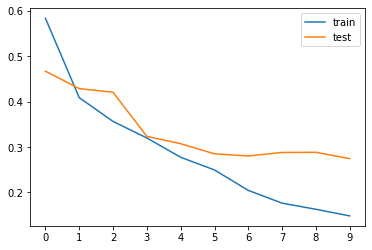

In [29]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xticks(np.arange(10))
plt.legend()

In [33]:
import statistics
train_loss = history.history['loss']
statistics.median(train_loss)

0.26342664659023285

### Question 4

What is the standard deviation of training loss for all the epochs for this model?

- **0.11**
- 0.66
- 0.99
- 0.33

In [34]:
statistics.stdev(train_loss)

0.1347794031507874

### Data Augmentation

For the next two questions, we'll generate more data using data augmentations. 

Add the following augmentations to your training data generator:

* `rotation_range=40,`
* `width_shift_range=0.2,`
* `height_shift_range=0.2,`
* `shear_range=0.2,`
* `zoom_range=0.2,`
* `horizontal_flip=True,`
* `fill_mode='nearest'`

In [35]:
train_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_ds = train_generator.flow_from_directory(
    'E:/YandexDisk/Data Science/ml-zoomcamp/08-deep-learning/dino-dragon/train/',
    class_mode='binary',
    target_size=(150, 150),
    batch_size=20,
    shuffle=True
)

test_generator = ImageDataGenerator(
    rescale=1./255
)

test_ds = test_generator.flow_from_directory(
    'E:/YandexDisk/Data Science/ml-zoomcamp/08-deep-learning/dino-dragon/test/',
    class_mode='binary',
    target_size=(150, 150),
    batch_size=20,
    shuffle=True
)

Found 1594 images belonging to 2 classes.
Found 394 images belonging to 2 classes.


### Question 5 

Let's train our model for 10 more epochs using the same code as previously.
Make sure you don't re-create the model - we want to continue training the model
we already started training.

What is the mean of test loss for all the epochs for the model trained with augmentations?

- 0.15
- 0.77
- **0.37**
- 0.97

In [36]:
history = model.fit(
    train_ds,
    epochs=10,
    validation_data=test_ds
    )

Epoch 1/10
80/80 [==============================] - 58s 718ms/step - loss: 0.4266 - val_loss: 0.3498
Epoch 2/10
80/80 [==============================] - 62s 773ms/step - loss: 0.4238 - val_loss: 0.2714
Epoch 3/10
80/80 [==============================] - 68s 855ms/step - loss: 0.4004 - val_loss: 0.3015
Epoch 4/10
80/80 [==============================] - 62s 772ms/step - loss: 0.4062 - val_loss: 0.4332
Epoch 5/10
80/80 [==============================] - 64s 805ms/step - loss: 0.3712 - val_loss: 0.3735
Epoch 6/10
80/80 [==============================] - 69s 863ms/step - loss: 0.4007 - val_loss: 0.3881
Epoch 7/10
80/80 [==============================] - 74s 926ms/step - loss: 0.3420 - val_loss: 0.4410
Epoch 8/10
80/80 [==============================] - 81s 1s/step - loss: 0.3505 - val_loss: 0.3554
Epoch 9/10
80/80 [==============================] - 78s 970ms/step - loss: 0.3300 - val_loss: 0.2956
Epoch 10/10
80/80 [==============================] - 75s 938ms/step - loss: 0.3230 - val_loss:

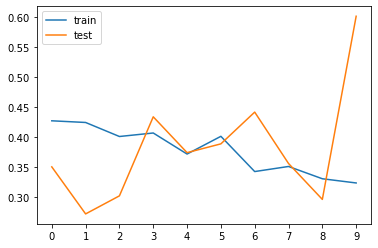

In [37]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xticks(np.arange(10))
plt.legend()

In [39]:
test_loss = history.history['loss']
statistics.mean(test_loss)

0.37742609083652495

### Question 6

What's the average of test accuracy for the last 5 epochs (from 6 to 10)
for the model trained with augmentations?

- 0.84
- 0.54
- 0.44
- **0.24**

In [44]:
statistics.mean(test_loss[5:])

0.34922127723693847

## Submit the results

- Submit your results here: https://forms.gle/XdH5ztBddvTvxzpT6
- You can submit your solution multiple times. In this case, only the last submission will be used
- If your answer doesn't match options exactly, select the closest one
## Deadline

The deadline for submitting is 21 November 2022, 23:00 CEST.

After that, the form will be closed.